<a href="https://colab.research.google.com/github/alpellario/ML-Classifiers-KNN-DecisionTrees-RandomForests/blob/main/ML_Case_Studies_KNN%2C_Decision_Trees_%26_Random_Forest_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
<tr>
<td></td><td></td>
<td>
<img src="https://i.hizliresim.com/pi37w34.png" width="200" height="200" />
</td>
<td></td>
<td style="padding-left:40px;">

# <strong>SERKAN KAAN KUHEYLAN</strong><br>
## <a href="https://github.com/alpellario?tab=repositories" target=”_blank”>Visit my GitHub repositories</a><br>
## <a href="https://www.linkedin.com/in/serkan-kaan-k%C3%BCheylan-a482b3180/" target=”_blank”>Visit my LinkedIn account</a>
## <a href="https://serkankaankuheylan.com/" target=”_blank”>Visit my Website</a>
</td>
</tr>
</table>


#ML Case Studies: KNN, Decision Trees & Random Forest Analysis

##Contents

#####1.   K Nearest Neighbors Project 1
#####2.   K Nearest Neighbors Project 2
#####3.   Decision Tree & Random Forest Classifiers Project 1 (Child Kyphosis Analysis Model)
#####4.   Decision Tree & Random Forest Classifiers Project 2 (LendingClub.com Loan Dataset)




# K Nearest Neighbors Project 1


## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data', index_col=0)

In [3]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [9]:
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [10]:
df_scaled.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_scaled

y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [19]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

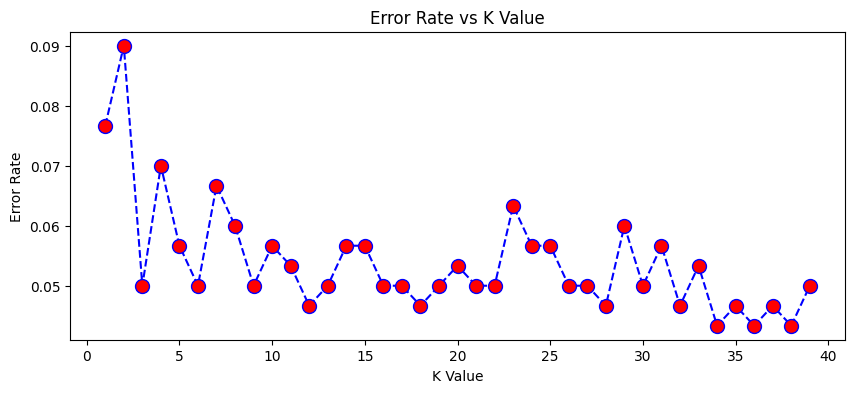

In [20]:
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[153   6]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# K Nearest Neighbors Project 2


## Import Libraries


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data


In [23]:
df = pd.read_csv('KNN_Project_Data')

In [24]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

## EDA



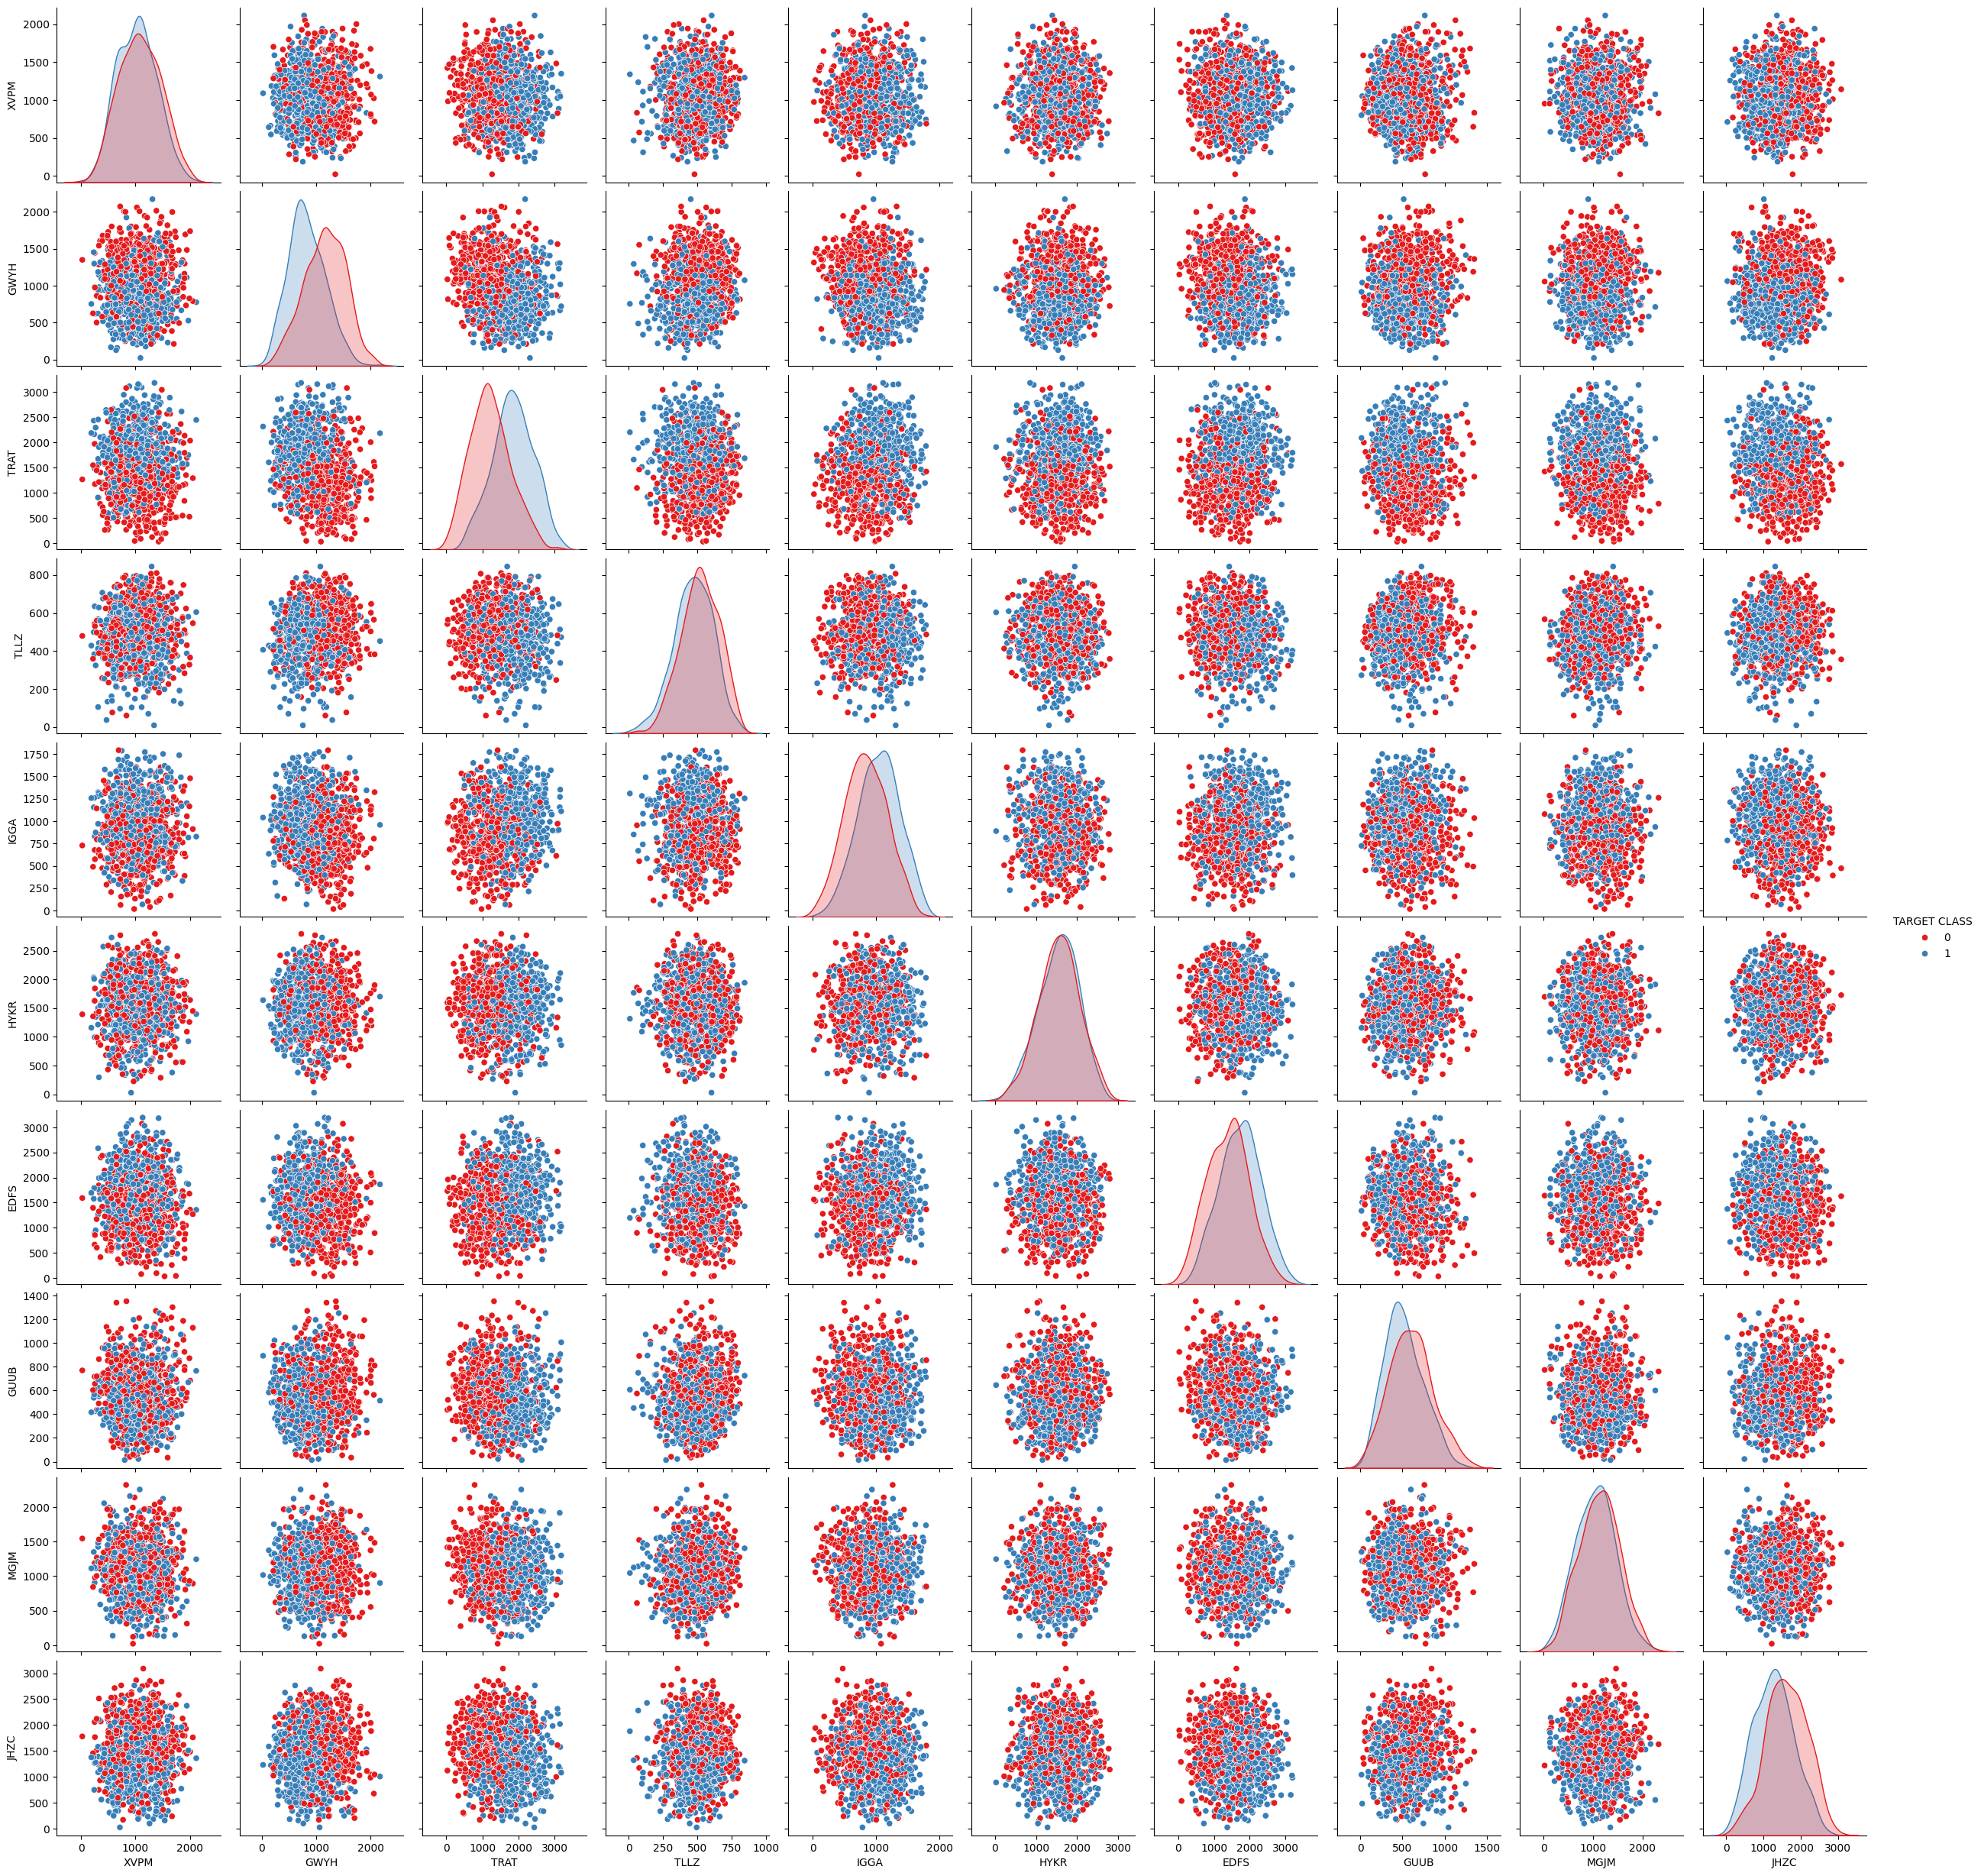

In [25]:
sns.pairplot(data=df, hue='TARGET CLASS', palette='Set1')

## Standardize the Variables


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [29]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [30]:
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [31]:
df_scaled.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [32]:
X = df_scaled

y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Using KNN


In [33]:
knn = KNeighborsClassifier(n_neighbors=1)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Predictions and Evaluations


In [35]:
pred = knn.predict(X_test)

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       151
           1       0.70      0.71      0.71       149

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



In [37]:
print(confusion_matrix(y_test, pred))

[[106  45]
 [ 43 106]]


## Choosing a best K Value

In [38]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

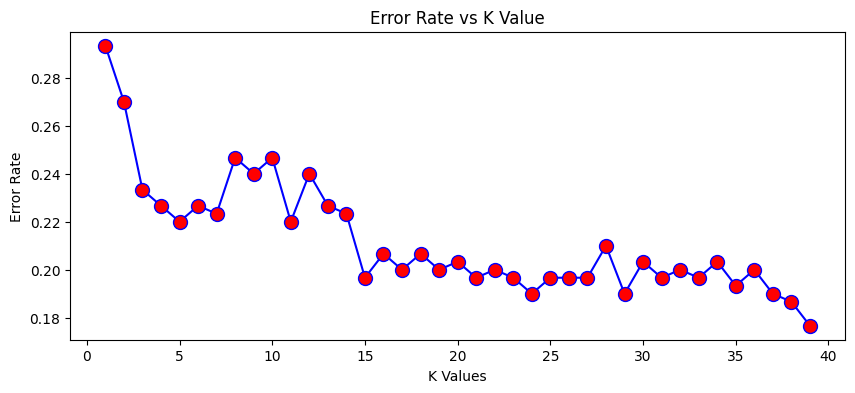

In [39]:
plt.figure(figsize=(10, 4))
plt.plot(range(1,40), error_rate, color='blue', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Values')
plt.ylabel('Error Rate')
plt.show()

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[117  34]
 [ 32 117]]


              precision    recall  f1-score   support

           0       0.79      0.77      0.78       151
           1       0.77      0.79      0.78       149

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



# Decision Tree & Random Forest Classifiers Project 1 (Child Kyphosis Analysis Model)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df3 = pd.read_csv('kyphosis.csv')

In [43]:
df3.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

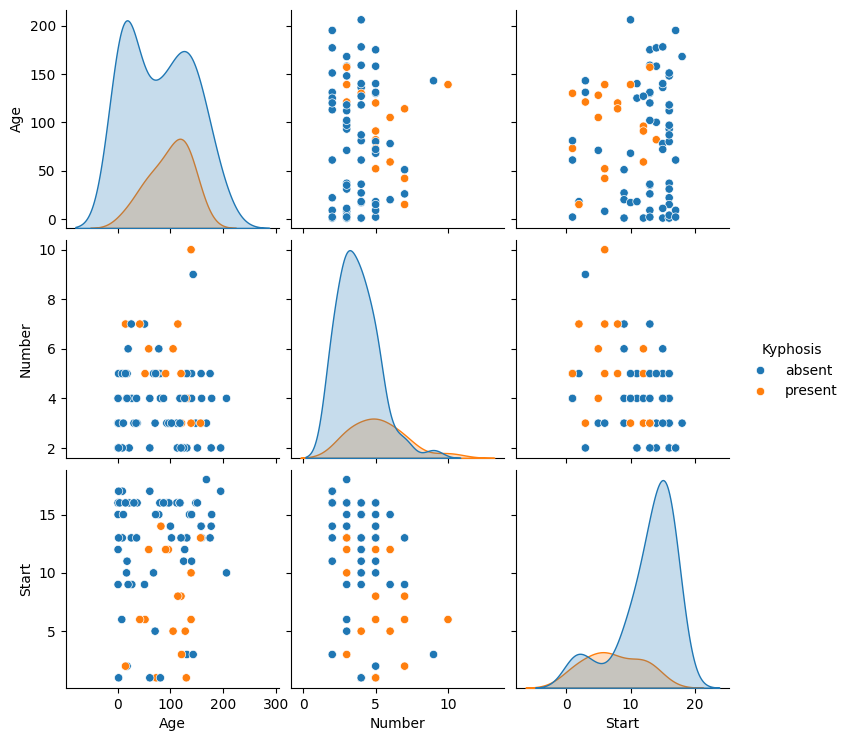

In [44]:
sns.pairplot(data=df3, hue='Kyphosis')

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
X = df3.drop('Kyphosis', axis=1)

y = df3['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
d_pred = dtree.predict(X_test)

In [50]:
print(confusion_matrix(y_test, d_pred))
print("\n")
print(classification_report(y_test, d_pred))

[[15  7]
 [ 2  1]]


              precision    recall  f1-score   support

      absent       0.88      0.68      0.77        22
     present       0.12      0.33      0.18         3

    accuracy                           0.64        25
   macro avg       0.50      0.51      0.48        25
weighted avg       0.79      0.64      0.70        25



In [51]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df3.columns[1:])
features

['Age', 'Number', 'Start']

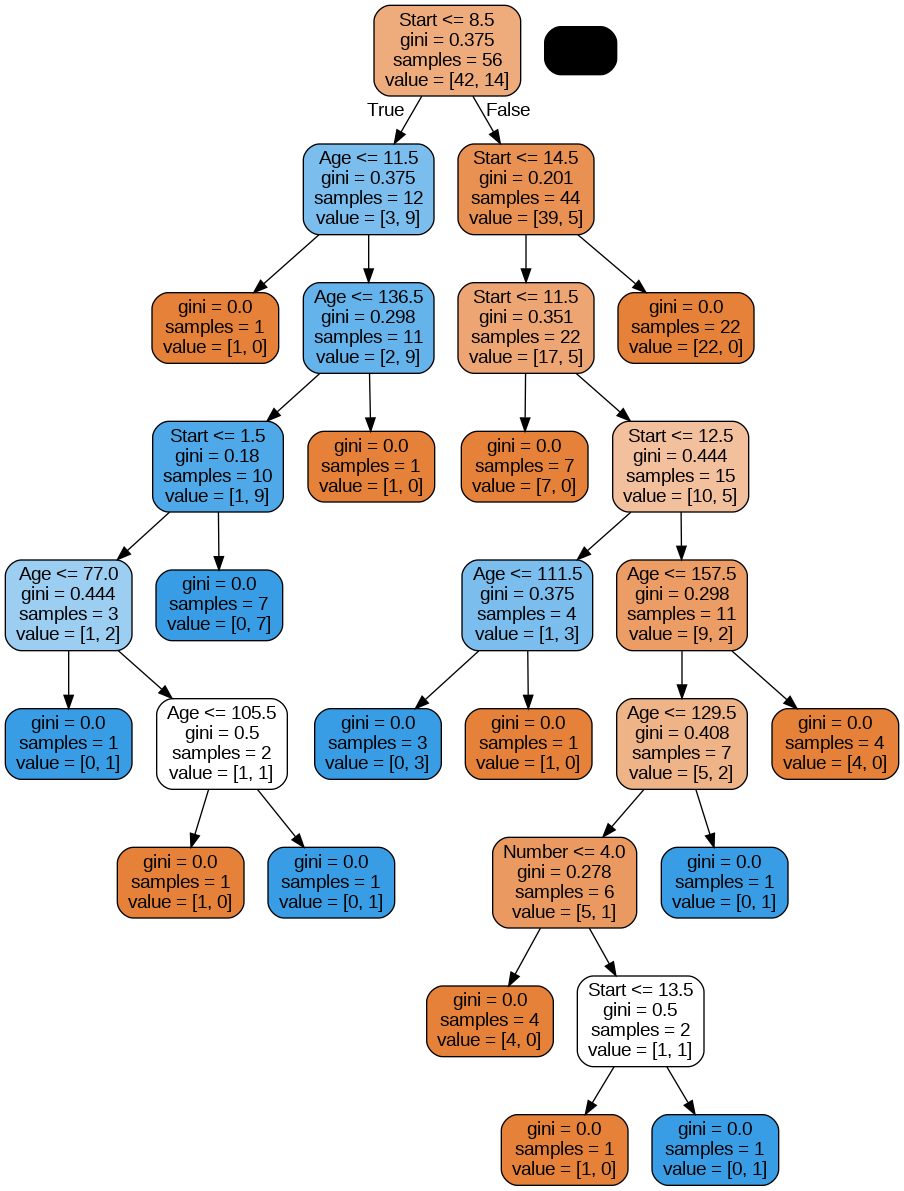

In [52]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=200)

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [56]:
rfc_pred = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[18  4]
 [ 2  1]]


              precision    recall  f1-score   support

      absent       0.90      0.82      0.86        22
     present       0.20      0.33      0.25         3

    accuracy                           0.76        25
   macro avg       0.55      0.58      0.55        25
weighted avg       0.82      0.76      0.78        25



# Decision Tree & Random Forest Classifiers Project 2 (LendingClub.com Loan Dataset)

##[EN Description]
In this project, I will be using data from LendingClub.com, which is publicly available. LendingClub is a platform that connects people in need of money (borrowers) with those looking to invest their money (investors). As an investor, you would want to invest in individuals who are likely to repay the loan. Therefore, I aim to create a model that will predict whether borrowers will fully repay their loans or not.

The data used is from the years 2007-2010, before the company went public.

Here's what the columns represent:
* credit.policy: Indicates whether the customer meets LendingClub.com's credit underwriting criteria. 1 if yes, otherwise 0.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan as a proportion (if an interest rate is 11%, it's recorded as 0.11). Higher interest rates are assigned to borrowers LendingClub.com deems riskier.
* installment: The monthly installment amount that the borrower must pay if the loan is financed.
* log.annual.inc: The natural logarithm of the borrower's self-reported annual income.
* dti: The borrower's debt-to-income ratio (amount of debt divided by annual income).
* fico: The borrower's FICO credit score.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of credit used relative to total credit available).
* inq.last.6mths: The number of inquiries by creditors about the borrower in the last six months.
* delinq.2yrs: The number of times the borrower has been 30+ days late on a payment in the past 2 years.
* pub.rec: The number of derogatory public records (bankruptcy filings, tax liens, or judgments) the borrower has.




##[TR Description]
Bu projede, LendingClub.com'dan alınan ve halka açık olan verileri kullanacağım. LendingClub, para ihtiyacı olan insanları (borç alanlar) paralarını yatırım yapmak isteyen insanlarla (yatırımcılar) bir araya getiren bir platform. Yatırımcı olarak, geri ödeme ihtimali yüksek olan insanlara yatırım yapmak istersiniz. Bu yüzden, borçluların kredilerini tam olarak geri ödeyip ödemeyeceklerini tahmin edecek bir model oluşturmayı amaçlıyorum.

Kullandığımız veriler, şirket halka açılmadan önceki 2007-2010 yıllarına ait.

İşte sütunların temsil ettiği şeyler:
* credit.policy: Müşteri LendingClub.com'un kredi değerlendirme kriterlerini karşılıyorsa 1, aksi takdirde 0.
* purpose: Kredinin amacı ("credit_card", "debt_consolidation", "educational", "major_purchase", "small_business" ve "all_other" değerlerini alır).
* int.rate: Kredinin faiz oranı, oran olarak (bir faiz oranı %11 ise 0.11 olarak kaydedilir). LendingClub.com tarafından daha riskli olarak değerlendirilen borçlulara daha yüksek faiz oranları atanır.
* installment: Kredi finanse edilirse borçlunun ödemesi gereken aylık taksit miktarı.
* log.annual.inc: Borçlunun kendi beyan ettiği yıllık gelirinin doğal logaritması.
* dti: Borçlunun borç-gelir oranı (yıllık gelire bölünmüş borç miktarı).
* fico: Borçlunun FICO kredi puanı.
* days.with.cr.line: Borçlunun kredi hattına sahip olduğu gün sayısı.
* revol.bal: Borçlunun döner bakiyesi (kredi kartı fatura dönemi sonunda ödenmemiş miktar).
* revol.util: Borçlunun döner kredi kullanım oranı (kullanılan kredi miktarının toplam krediye oranla).
* inq.last.6mths: Borçlunun son 6 ayda krediyi sorgulayan alacaklıların sayısı.
* delinq.2yrs: Borçlunun son 2 yılda 30+ gün geç ödeme yaptığı durumların sayısı.
* pub.rec: Borçlunun olumsuz kamu kayıtlarının (iflas kayıtları, vergi hacizleri veya yargı kararları) sayısı.



# Import Libraries


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data


In [59]:
loans = pd.read_csv('loan_data.csv')

In [60]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [61]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [62]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

# Exploratory Data Analysis



In [63]:
sns.set_style('whitegrid')

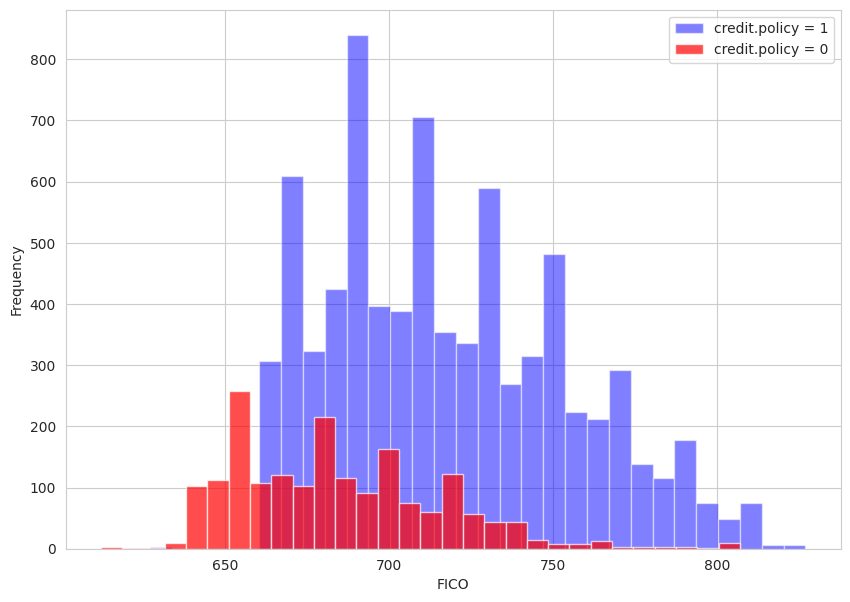

In [64]:
plt.figure(figsize=(10,7))
loans[loans['credit.policy'] == 1]['fico'].plot.hist(bins=30, color='blue', alpha=.5, label='credit.policy = 1')
loans[loans['credit.policy'] == 0]['fico'].plot.hist(bins=30, color='red', alpha=.7, label='credit.policy = 0')
plt.xlabel('FICO')
plt.legend()

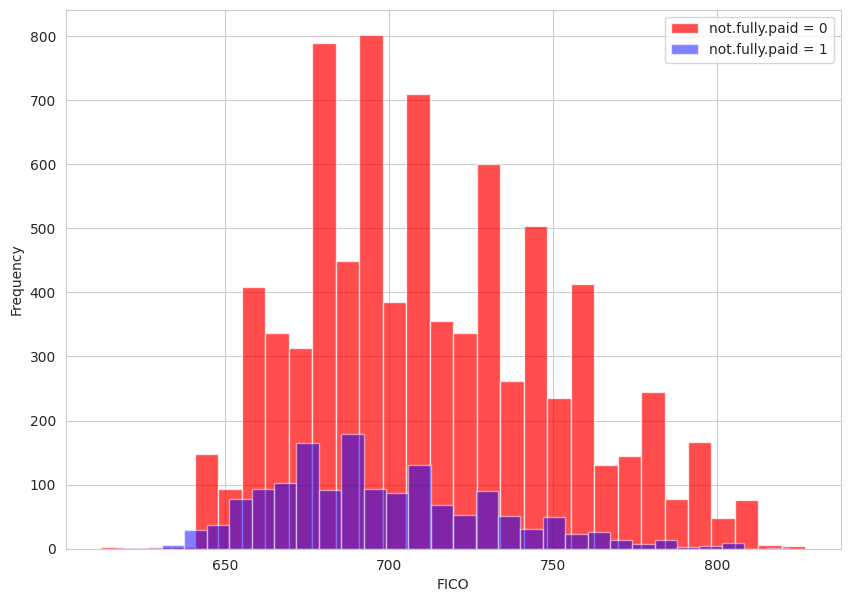

In [65]:
plt.figure(figsize=(10,7))
loans[loans['not.fully.paid'] == 0]['fico'].plot.hist(color='red', bins=30, alpha=.7, label='not.fully.paid = 0')
loans[loans['not.fully.paid'] == 1]['fico'].plot.hist(color='blue', bins=30, alpha=.5, label='not.fully.paid = 1')
plt.xlabel('FICO')
plt.legend()

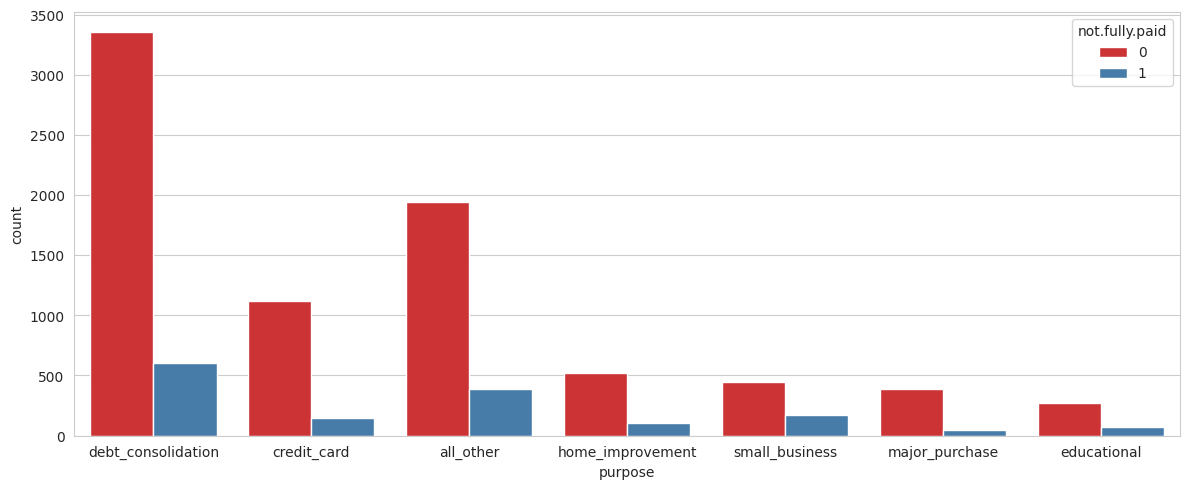

In [66]:
plt.figure(figsize=(12,5))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette='Set1')
plt.tight_layout()

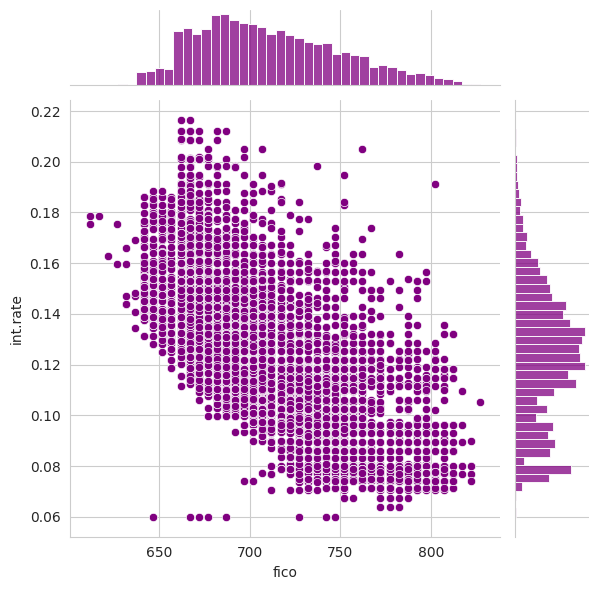

In [67]:
sns.jointplot(data=loans, x='fico', y='int.rate', color='purple')

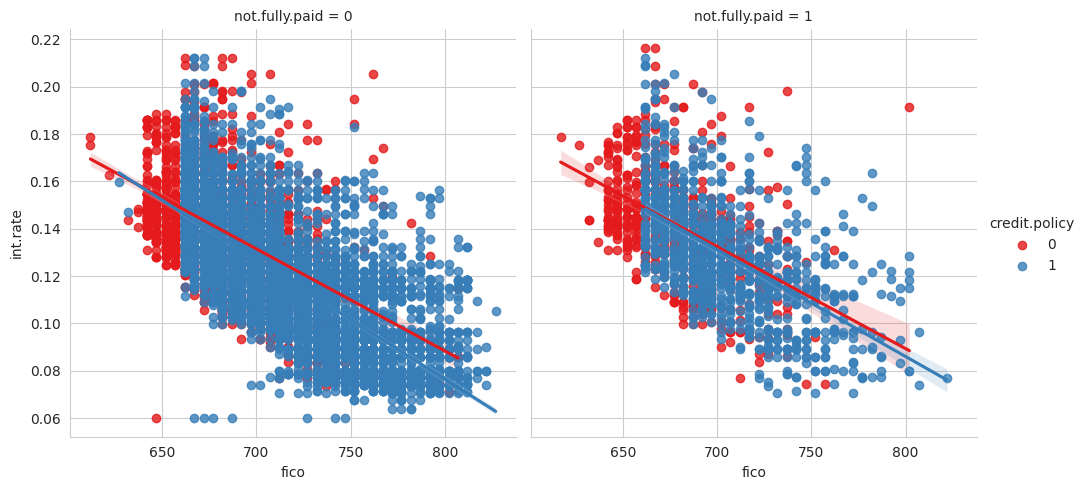

In [68]:
sns.lmplot(data=loans, x='fico', y='int.rate', hue='credit.policy', palette='Set1', col='not.fully.paid')

## Setting up the Data


In [69]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [70]:
loans['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

## Categorical Features



In [71]:
pd.get_dummies(data=loans, columns=['purpose'], drop_first=True)

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  purpose_credit_card  \
0           0               0                    0   
1           0               0                    1   
2           0               0                    0   
3           0               0                    0   
4           0               0                    1   
...       ...             ...                  ...   
9573        0               1                    0   
9574        0               1                    0   
9575        0               1                    0   
9576        0               1                    0   
9577        0               1                    0   

      purpose_debt_consolidation  purpose_educational  \
0                              1                    0   
1                              0                    0   
2                              1                    0   
3                              1                    0   
4                              0                    0   
...                          ...                  ...   
9573                           0                    0   
9574                           0                    0   
9575                           1                    0   
9576                           0                    0   
9577                           1                    0   

      purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                            0                       0                       0  
1                            0                       0                       0  
2                            0                       0                       0  
3                            0                       0                       0  
4                            0                       0                       0  
...                        ...                     ...                     ...  
9573                         0                       0                       0  
9574                         0                       0                       0  
9575                         0                       0                       0  
9576        

In [72]:
final_data = pd.get_dummies(data=loans, columns=['purpose'], drop_first=True)

## Train Test Split



In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
X = final_data.drop('not.fully.paid', axis=1)

y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training a Decision Tree Model



In [75]:
dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree


In [77]:
pred = dtree.predict(X_test)

In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2421
           1       0.22      0.25      0.23       453

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.76      0.74      0.75      2874



In [79]:
print(confusion_matrix(y_test, pred))

[[2021  400]
 [ 341  112]]


## Training the Random Forest model


In [80]:
rfc = RandomForestClassifier(n_estimators=200)

In [81]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

## Predictions and Evaluation


In [82]:
rfc_pred = rfc.predict(X_test)

In [83]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2421
           1       0.41      0.02      0.03       453

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.78      0.84      0.77      2874



In [84]:
print(confusion_matrix(y_test, rfc_pred))

[[2411   10]
 [ 446    7]]
